# Exploratory Data Analysis

## Setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import plotly.graph_objects as go

import os

In [6]:
df = pd.read_pickle('../data/processed/USDJPY-5m-20240101-20241231_FEATURES.pkl')

In [7]:
label = pd.read_pickle('../data/labels/meta_labels/USDJPY-5m-20240101-20241231-EMACross_9_20-meta.pkl')

In [8]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'close_pct_return',
       'close_return', 'close_log_return', 'close_fd_return',
       'close_log_fd_return', 'EMA_5', 'EMA_9', 'EMA_20', 'EMA_24', 'EMA_36',
       'EMA_50', 'EMA_100', 'ATRr_14', 'ATRr_60', 'ATRr_120', 'ADX_14',
       'ADXR_14_2', 'DMP_14', 'DMN_14', 'RSI_14', 'RSI_25', 'RSI_50',
       'BBL_5_2.0_2.0', 'BBM_5_2.0_2.0', 'BBU_5_2.0_2.0', 'BBB_5_2.0_2.0',
       'BBP_5_2.0_2.0', 'BBL_10_2.0_2.0', 'BBM_10_2.0_2.0', 'BBU_10_2.0_2.0',
       'BBB_10_2.0_2.0', 'BBP_10_2.0_2.0', 'BBL_15_2.0_2.0', 'BBM_15_2.0_2.0',
       'BBU_15_2.0_2.0', 'BBB_15_2.0_2.0', 'BBP_15_2.0_2.0', 'BBL_20_2.0_2.0',
       'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'BBB_20_2.0_2.0', 'BBP_20_2.0_2.0',
       'MACD_8_17_9', 'MACDh_8_17_9', 'MACDs_8_17_9', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'unix_time', 'hour', 'dow', 'dom',
       'month', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'dom_sin',
       'dom_cos', 'month_sin',

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
df[df.columns.to_list()] = scaler.fit_transform(df[df.columns.to_list()])

In [12]:
df.head()

,open,high,low,close,volume,spread,close_pct_return,close_return,close_log_return,close_fd_return,...,dom,month,hour_sin,hour_cos,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-05 03:25:00,-1.353545,-1.352484,-1.345638,-1.350622,-0.038322,-0.135157,0.253855,0.244658,0.253934,-0.159698,...,-1.244398,-1.633617,0.998725,0.999956,-1.460888,-1.101837,1.191214,0.80546,0.718559,1.259109
2024-01-05 03:30:00,-1.350699,-1.350958,-1.343202,-1.343203,-0.289912,-0.170730,0.643481,0.620114,0.643336,0.005412,...,-1.244398,-1.633617,0.998725,0.999956,-1.460888,-1.101837,1.191214,0.80546,0.718559,1.259109
2024-01-05 03:35:00,-1.343280,-1.350958,-1.339750,-1.347878,0.262377,-0.134949,-0.410249,-0.395324,-0.409921,-0.360691,...,-1.244398,-1.633617,0.998725,0.999956,-1.460888,-1.101837,1.191214,0.80546,0.718559,1.259109
2024-01-05 03:40:00,-1.347752,-1.351569,-1.341273,-1.344016,-0.265916,-0.125380,0.333499,0.321456,0.333538,-0.194505,...,-1.244398,-1.633617,0.998725,0.999956,-1.460888,-1.101837,1.191214,0.80546,0.718559,1.259109
2024-01-05 03:45:00,-1.343890,-1.350551,-1.337212,-1.343305,-0.422183,-0.158179,0.058989,0.056930,0.059159,-0.260338,...,-1.244398,-1.633617,0.998725,0.999956,-1.460888,-1.101837,1.191214,0.80546,0.718559,1.259109


<Axes: xlabel='timestamp'>

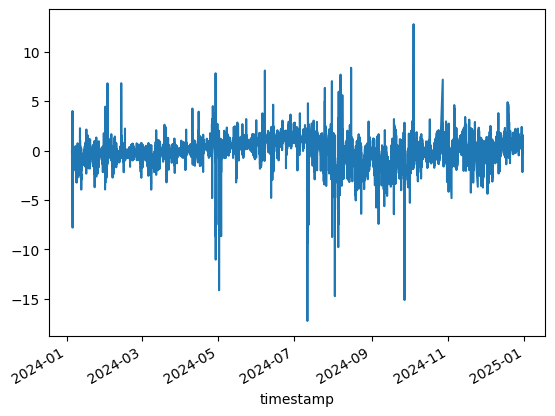

In [13]:
df['close_fd_return'].plot()

<Axes: xlabel='timestamp'>

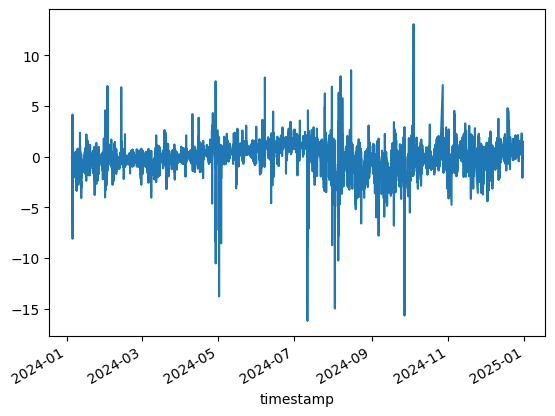

In [14]:
df['close_log_fd_return'].plot()

count    7.378200e+04
mean    -8.835800e-17
std      1.000007e+00
min     -1.722919e+01
25%     -5.623478e-01
50%      2.561065e-02
75%      6.937535e-01
max      1.276932e+01
Name: close_fd_return, dtype: float64

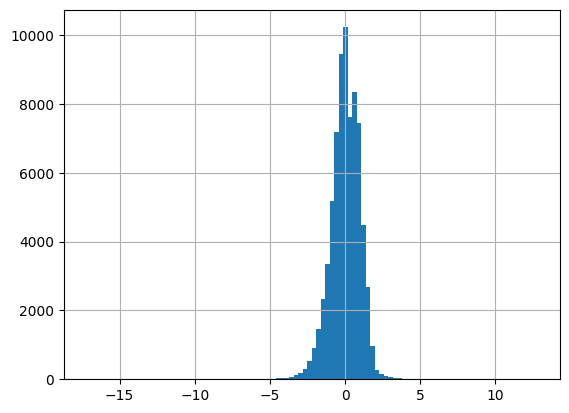

In [15]:
df['close_fd_return'].hist(bins=100)
df['close_fd_return'].describe()

In [16]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['close_fd_return'].dropna())
print('ADF p-value:', adf_result[1])

ADF p-value: 1.2530492003269305e-17


In [17]:
plt.rcParams["figure.figsize"] = (12, 2)


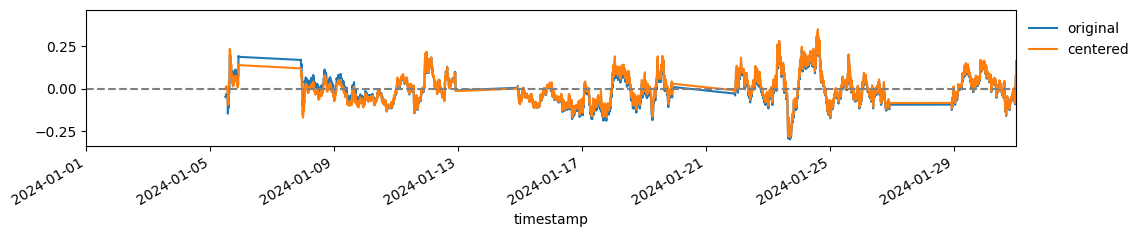

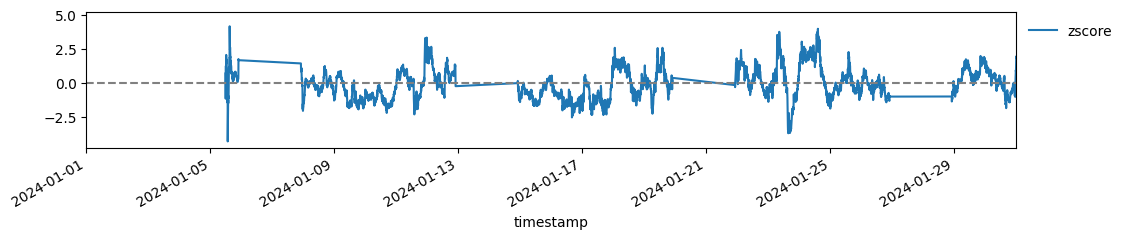

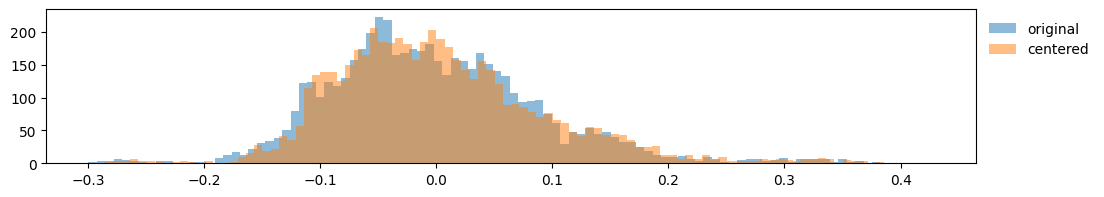

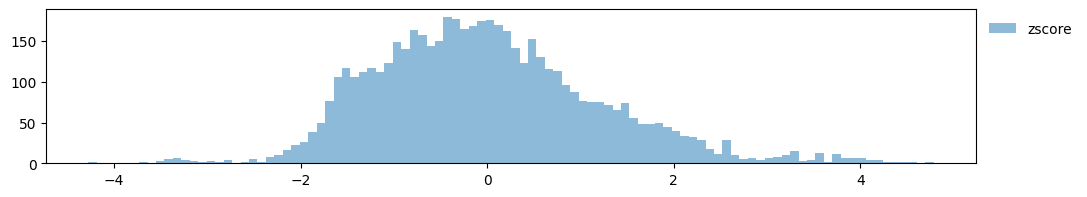

In [45]:
sample = df.loc["2024-01-01":"2024-01-31", 'close']
n=100
comparison = pd.concat([
    sample.pct_change(n).rename("original"),
    (sample.pct_change(n) - sample.pct_change(n).expanding().mean()).rename("centered"),
    ((sample.pct_change(n) - sample.pct_change(n).expanding().mean()) / sample.pct_change(n).expanding().std()).rename("zscore"),
], axis=1).dropna()

start_date = pd.Timestamp("2024-01-01")
end_date = pd.Timestamp("2024-01-31")

comparison["original"].plot()
comparison["centered"].plot()
plt.xlim(start_date, end_date)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.axhline(0, c="grey", ls="--")
plt.show()

comparison["zscore"].plot()
plt.xlim(start_date, end_date)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.axhline(0, c="grey", ls="--")
plt.show()

bins=100
plt.hist(comparison["original"], bins=bins, alpha=0.5, label="original")
plt.hist(comparison["centered"], bins=bins, alpha=0.5, label="centered")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.show()


plt.hist(comparison["zscore"], bins=bins, alpha=0.5, label="zscore")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.show()

In [46]:
n = 21
n_barriers = 2
barrier = sample.pct_change(n).quantile(0.68)  # approx. a 1σ interval, assuming normal distributed returns


,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
close,-0.178822,-0.052646,-0.032594,-0.020145,-0.010481,-0.001318,0.007755,0.016848,0.028045,0.050776,0.332038


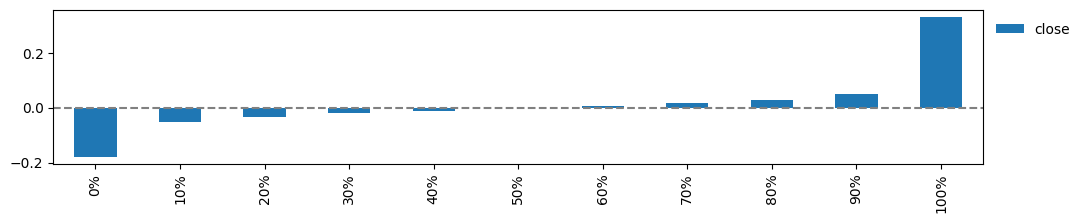

In [47]:
percentiles = sample.pct_change(n).describe(percentiles=np.linspace(0,1,11)).drop(["count", "mean", "std", "min", "max"])
display(percentiles.to_frame().T)
percentiles.plot.bar()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.axhline(0, c="grey", ls="--")
plt.show()

In [41]:
from barrier_method import BarrierMethod

In [48]:
rets = sample.pct_change()


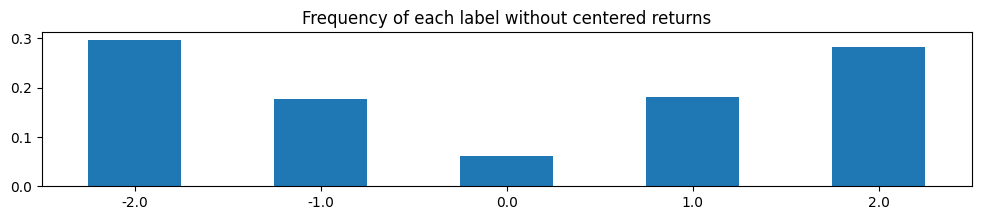

In [58]:
barrier_method = BarrierMethod(returns=rets, n=n, barrier=barrier, n_barriers=n_barriers, center=False)
barrier_method.labels.value_counts(normalize=True).sort_index().plot.bar(rot=0, title="Frequency of each label without centered returns")
# plt.gcf().savefig("../figures/barrier_freq.png")
plt.show()

In [59]:
barrier_method.labels

timestamp
2024-01-05 03:25:00    1.0
2024-01-05 03:30:00    2.0
2024-01-05 03:35:00    2.0
2024-01-05 03:40:00    2.0
2024-01-05 03:45:00    2.0
                      ... 
2024-01-31 23:35:00    NaN
2024-01-31 23:40:00    NaN
2024-01-31 23:45:00    NaN
2024-01-31 23:50:00    NaN
2024-01-31 23:55:00    NaN
Length: 5430, dtype: float64

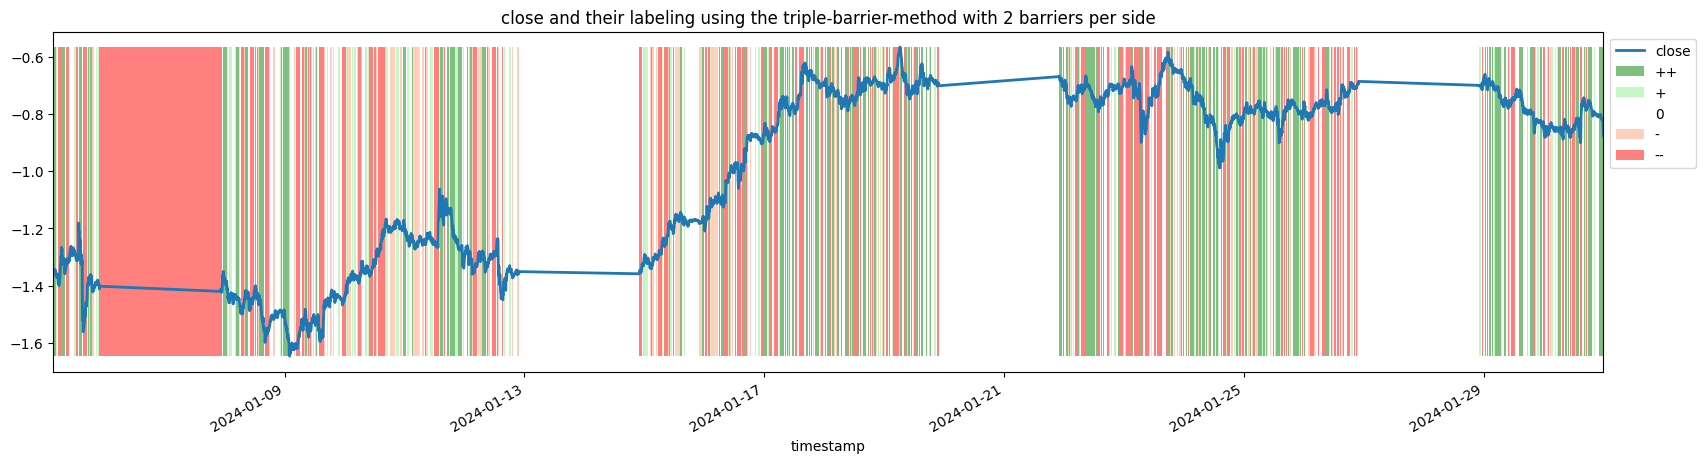

In [53]:
price_col = 'close'
start_date = pd.Timestamp("2024-01-01")
end_date = pd.Timestamp("2024-01-31")

labels = barrier_method.labels.rename("label")
idx = labels.index.intersection(sample.index)

plot_df = pd.concat([sample, labels], axis=1).loc[idx].dropna()
start_date, end_date = max(start_date, plot_df.index.min()), min(end_date, plot_df.index.max())
plot_df = plot_df.loc[start_date:end_date]
figsize = (20, 5)
fig, ax = plt.subplots(figsize=figsize)
ax.set_title(f"{price_col} and their labeling using the triple-barrier-method with 2 barriers per side")
plot_df[price_col].plot(ax=ax, linewidth=2)
ylim = (plot_df[price_col].min(), plot_df[price_col].max())
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==2,facecolor='green', alpha=0.5, label="++")
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==1,facecolor='lightgreen', alpha=0.5, label="+")
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==0,facecolor='white', alpha=0.5, label="0")
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==-1,facecolor='lightsalmon', alpha=0.5, label="-")
ax.fill_between(plot_df[price_col].index, ylim[0], ylim[1], where=plot_df["label"]==-2,facecolor='red', alpha=0.5, label="--")
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.set_xlim(start_date, end_date)
plt.show()


AttributeError: 'BarrierMethod' object has no attribute 'barriers'

/Users/yoyo/personal/fxml/.venv/lib/python3.12/site-packages/barrier_method/barrier_method.py:279: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot([barriers.index.min(), barriers.index.min()],


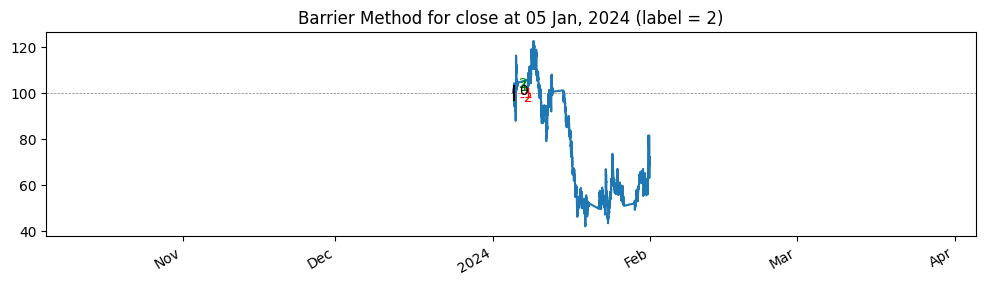

In [60]:
fig = barrier_method.plot_at_date("2024-01-05 03:45:00")
plt.show()